<a href="https://colab.research.google.com/github/KuganParthiban/portfolio_projects/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [4]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

In [5]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [6]:
#rename columns
df=df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "subs_len", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "total_sec_calls", "Frequency of use": "total_num_calls", "Frequency of SMS": "total_num_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})

In [7]:
df.nunique()

call_failure            37
complains                2
subs_len                45
charge_amount           11
total_sec_calls       1756
total_num_calls        242
total_num_sms          405
distinct_call_nums      92
age_group                5
tariff_plan              2
status                   2
age                      5
customer_value        2654
FN                    2654
FP                    2195
Churn                    2
dtype: int64

In [8]:
df=df[['call_failure', 'complains', 'subs_len', 'charge_amount',
       'total_sec_calls', 'total_num_calls', 'total_num_sms',
       'distinct_call_nums', 'age_group', 'tariff_plan', 'status', 'age', 'Churn']]

### **Corellation Matrix** 

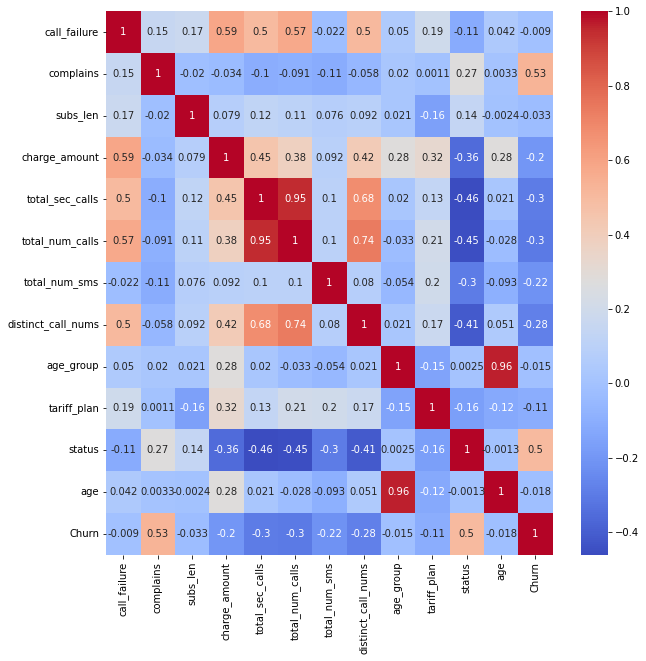

In [9]:
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

### Proportion of Churn

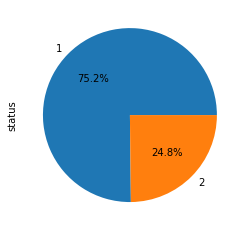

In [10]:
status_prop = df['status'].value_counts(normalize=True)*100
status_prop.plot(kind='pie',autopct='%.1f%%')
plt.show()

### Proportion of Status

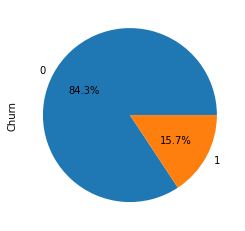

In [11]:
churn_prop = df['Churn'].value_counts(normalize=True)*100
churn_prop.plot(kind='pie',autopct='%.1f%%')
plt.show()

###**Rename age group to A,B,C,D,E label**

In [12]:
df.loc[df['age_group'] == 1, 'age_group'] = 'A'
df.loc[df['age_group'] == 2, 'age_group'] = 'B'
df.loc[df['age_group'] == 3, 'age_group'] = 'C'
df.loc[df['age_group'] == 4, 'age_group'] = 'D'
df.loc[df['age_group'] == 5, 'age_group'] = 'E'

### Does age group influence customer to churn?

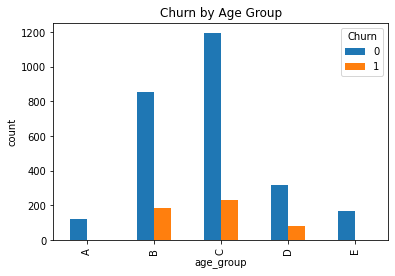

In [13]:
churn_age_prop = pd.crosstab(index=df['age_group'],columns=df['Churn'])

churn_age_prop.plot(kind='bar')
plt.title('Churn by Age Group')
plt.ylabel('count')

plt.show()

In [14]:
print(df.groupby('age_group')['Churn'].value_counts())

age_group  Churn
A          0         123
B          0         853
           1         184
C          0        1195
           1         230
D          0         316
           1          79
E          0         168
           1           2
Name: Churn, dtype: int64


### Does call failure influence customer to churn?

In [15]:
df['call_failure'].value_counts()

0     702
5     244
7     166
6     161
8     156
9     149
3     141
2     137
4     133
11    125
10    124
1     121
13     99
12     97
14     85
15     69
16     67
18     53
17     45
20     37
19     33
21     29
23     25
25     21
22     21
28     17
26     17
24     16
30     16
27     13
32      8
29      7
31      6
33      3
34      3
35      2
36      2
Name: call_failure, dtype: int64

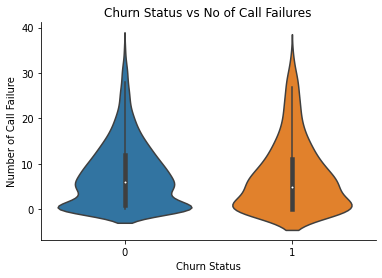

In [16]:
sns.violinplot(x=df['Churn'], y=df['call_failure'])
sns.despine()
plt.ylabel('Number of Call Failure')
plt.xlabel('Churn Status')
plt.title('Churn Status vs No of Call Failures')
plt.show()

### Does the length of subs affects customer to churn?

In [17]:
df.groupby('subs_len')['Churn'].mean()

subs_len
3     0.500000
4     0.500000
5     0.500000
6     0.500000
7     0.473684
8     0.416667
9     0.409091
10    0.312500
11    0.346154
12    0.210526
13    0.125000
14    0.080000
15    0.064516
16    0.033333
17    0.031250
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.024390
25    0.038462
26    0.044444
27    0.087719
28    0.135593
29    0.136986
30    0.225000
31    0.211538
32    0.206612
33    0.250000
34    0.238806
35    0.206140
36    0.173913
37    0.179039
38    0.155039
39    0.134328
40    0.091398
41    0.109091
42    0.112500
43    0.125000
44    0.090909
45    0.043478
46    0.000000
47    0.000000
Name: Churn, dtype: float64

### Tariff plan vs Customer Churn

In [18]:
df['tariff_plan'].value_counts()

1    2905
2     245
Name: tariff_plan, dtype: int64

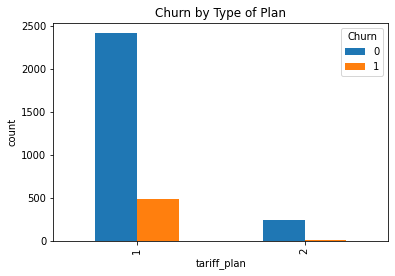

In [19]:
plan_churn = pd.crosstab(index=df['tariff_plan'],columns=df['Churn'])
plan_churn

#1 - pay as you go 
#2 - contractual
#customers with a tariff plan of 1 which is pay as you go have a higher number that churn compared tho those customers with a contractual plan.

plan_churn.plot(kind='bar')
plt.title('Churn by Type of Plan')
plt.ylabel('count')

plt.show()

### Status vs Customer Churn

In [20]:
df['status'].value_counts()

1    2368
2     782
Name: status, dtype: int64

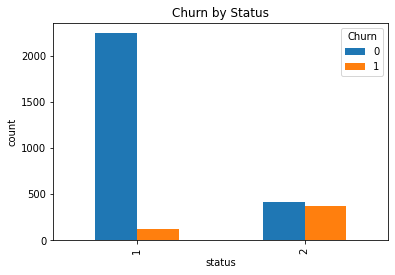

In [21]:
status_churn = pd.crosstab(index=df['status'],columns=df['Churn'])
status_churn

status_churn.plot(kind='bar')
plt.title('Churn by Status')
plt.ylabel('count')

plt.show()

#1 - active customer 
#2 - non-active customer 

In [22]:
#H null - the status of the customer does not have a significance difference on customer churn 
#H alternative - the status of the customer does have a significance affect of the customer churn 

import scipy.stats as stats
c, p, dof, expected = stats.chi2_contingency(status_churn)
p

#p-value is less than 0.05. Therefore, H alternative is accepted. Customer who are not active have a higher tendency of churn.

6.918764667789738e-172

### Complains vs Customer Churn

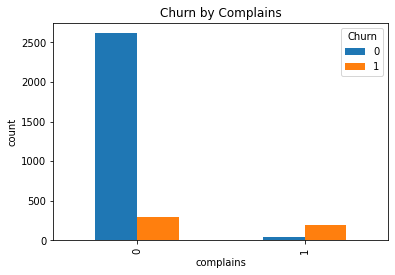

9.75604260522434e-195

In [23]:
df['complains'].value_counts()

#0 - no complain
#1 - got complain

complains_churn = pd.crosstab(index=df['complains'],columns=df['Churn'])
complains_churn 

complains_churn.plot(kind='bar')
plt.title('Churn by Complains')
plt.ylabel('count')

plt.show()

c, p, dof, expected = stats.chi2_contingency(complains_churn)
p

### Relationship between Age and Customer Churn

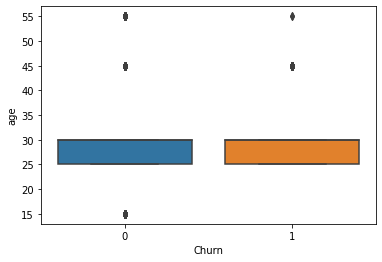

In [24]:
sns.boxplot(x='Churn',
            y='age',
           data=df)
plt.show()



In [25]:
import scipy.stats as stats
stats.levene(df['age'][df['Churn']=='0'],
             df['age'][df['Churn']=='1'],
             center='mean')

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [26]:
stats.ttest_ind(df['age'][df['Churn']=='0'],
               df['age'][df['Churn']=='1'],
                equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

### Convert int data types to categorical

In [27]:
df.dtypes

call_failure           int64
complains              int64
subs_len               int64
charge_amount          int64
total_sec_calls        int64
total_num_calls        int64
total_num_sms          int64
distinct_call_nums     int64
age_group             object
tariff_plan            int64
status                 int64
age                    int64
Churn                  int64
dtype: object

In [28]:
for col in ['Churn', 'age_group', 'tariff_plan', 'status', 'charge_amount']:
   df[col] = df[col].astype('category')

In [29]:
df.dtypes

call_failure             int64
complains                int64
subs_len                 int64
charge_amount         category
total_sec_calls          int64
total_num_calls          int64
total_num_sms            int64
distinct_call_nums       int64
age_group             category
tariff_plan           category
status                category
age                      int64
Churn                 category
dtype: object

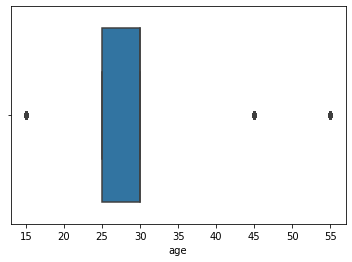

In [30]:
sns.boxplot(x='age',
           data=df)
plt.show()

In [31]:
df['charge_amount'].value_counts()

0     1768
1      617
2      395
3      199
4       76
5       30
8       19
7       14
9       14
6       11
10       7
Name: charge_amount, dtype: int64

### Charge amount vs Customer Churn

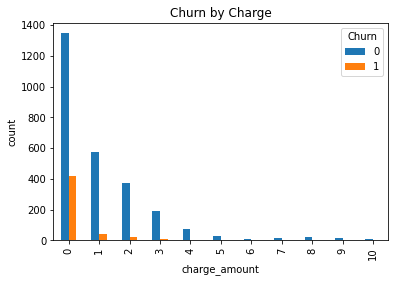

2.046805217140257e-38

In [32]:
charge_churn = pd.crosstab(index=df['charge_amount'],columns=df['Churn'])
charge_churn

charge_churn.plot(kind='bar')
plt.title('Churn by Charge')
plt.ylabel('count')

plt.show()

c, p, dof, expected = stats.chi2_contingency(charge_churn)
p

### Total number of calls and sms 

In [33]:
df['call + sms'] = df['total_num_calls'] + df['total_num_sms']
df.head()

,call_failure,complains,subs_len,charge_amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,age_group,tariff_plan,status,age,Churn,call + sms
0,8,0,38,0,4370,71,5,17,C,1,1,30,0,76
1,0,0,39,0,318,5,7,4,B,1,2,25,0,12
2,10,0,37,0,2453,60,359,24,C,1,1,30,0,419
3,10,0,38,0,4198,66,1,35,A,1,1,15,0,67
4,3,0,38,0,2393,58,2,33,A,1,1,15,0,60


In [34]:
df['call + sms'].value_counts()

0      132
13      47
63      26
76      26
81      25
      ... 
475      1
474      1
525      1
346      1
538      1
Name: call + sms, Length: 487, dtype: int64

In [35]:
meanCallsms_churn = df.groupby('Churn',as_index = False)['call + sms'].mean()
meanCallsms_churn = meanCallsms_churn.round(2)
meanCallsms_churn

,Churn,call + sms
0,0,160.85
1,1,44.94


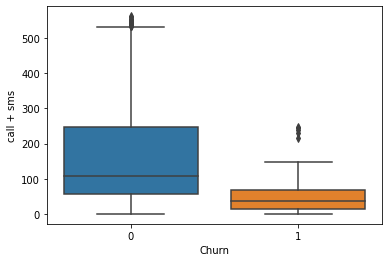

In [36]:
sns.boxplot(x='Churn',
            y='call + sms',
           data=df)
plt.show()

## the boxplot shows that customers with a lower number of call and sms tend to churn compared to those customers who has higher number of calls and sms 

In [37]:
stats.levene(df['call + sms'][df['Churn']=='0'],
             df['call + sms'][df['Churn']=='1'],
             center='mean')

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [38]:
stats.ttest_ind(df['call + sms'][df['Churn']=='0'],
               df['call + sms'][df['Churn']=='1'],
                equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

In [39]:
df.columns

Index(['call_failure', 'complains', 'subs_len', 'charge_amount',
       'total_sec_calls', 'total_num_calls', 'total_num_sms',
       'distinct_call_nums', 'age_group', 'tariff_plan', 'status', 'age',
       'Churn', 'call + sms'],
      dtype='object')

### Modeling

In [40]:
df = df[['call_failure', 'complains', 'subs_len', 'charge_amount',
       'total_sec_calls', 'total_num_calls', 'total_num_sms',
       'distinct_call_nums', 'tariff_plan', 'status', 'age_group',
       'Churn']]

In [41]:
df.head()

,call_failure,complains,subs_len,charge_amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,tariff_plan,status,age_group,Churn
0,8,0,38,0,4370,71,5,17,1,1,C,0
1,0,0,39,0,318,5,7,4,1,2,B,0
2,10,0,37,0,2453,60,359,24,1,1,C,0
3,10,0,38,0,4198,66,1,35,1,1,A,0
4,3,0,38,0,2393,58,2,33,1,1,A,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   call_failure        3150 non-null   int64   
 1   complains           3150 non-null   int64   
 2   subs_len            3150 non-null   int64   
 3   charge_amount       3150 non-null   category
 4   total_sec_calls     3150 non-null   int64   
 5   total_num_calls     3150 non-null   int64   
 6   total_num_sms       3150 non-null   int64   
 7   distinct_call_nums  3150 non-null   int64   
 8   tariff_plan         3150 non-null   category
 9   status              3150 non-null   category
 10  age_group           3150 non-null   category
 11  Churn               3150 non-null   category
dtypes: category(5), int64(7)
memory usage: 188.7 KB


In [43]:
#Assign input and output
x = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [44]:
#Handling categorical variable (inputs only)
#Transform Categorical to Encoded Dummy Numeric Variable
x = pd.get_dummies(x,drop_first=True)

In [45]:
#Partioning dataset. Due to inbalance dataset value, use stratified sampling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0, stratify = y)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

### Regression Model 

In [47]:
#####Train Logistic Regression Algorithm

##Import LogisticRegression() function
#from sklearn.linear_model import LogisticRegression

###Create a Logistic Regression classifier
#clf = LogisticRegression(random_state=0)

###Train the Logistic Regression algorithm using train set
#clf.fit(x_train,y_train)

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
#Scaling test set
x_test = scaler.transform(x_test)

In [50]:
#Apply model
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [51]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.head(10)

,Actual,Predicted
1243,0,0
1410,0,0
826,1,1
139,0,0
3048,0,0
1701,0,1
480,0,0
1845,0,0
1496,0,0
1711,0,1


In [52]:
pd.crosstab(y_pred,y_test)

Churn,0,1
row_0,,
0,782,25
1,15,123


### Metrix Report

In [53]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       797
           1       0.89      0.83      0.86       148

    accuracy                           0.96       945
   macro avg       0.93      0.91      0.92       945
weighted avg       0.96      0.96      0.96       945



In [54]:
#Save the Model
import pickle

filename = 'churn_model.sav' #Assigning name to the model

#Write it to the file
pickle.dump(clf, open(filename,'wb')) #wb - write binary

In [55]:
#Save the Scaler Parameter
import joblib
joblib.dump(scaler,'scaler_class.save')

['scaler_class.save']

In [56]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test,y_pred)

print(CM)

[[782  15]
 [ 25 123]]
